In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions
sc = SparkContext()
spark = SparkSession.builder.appName("reddit").getOrCreate()

In [2]:
# read LZO as Hadoop file

# rc_1810 = sc.newAPIHadoopFile("s3://bigdatateaching/reddit/lzo/RC_2018-10.lzo",
# "com.hadoop.mapreduce.LzoTextInputFormat",
# "org.apache.hadoop.io.LongWritable",
# "org.apache.hadoop.io.Text")
# rc_1811 = sc.newAPIHadoopFile("s3://bigdatateaching/reddit/lzo/RC_2018-11.lzo",
# "com.hadoop.mapreduce.LzoTextInputFormat",
# "org.apache.hadoop.io.LongWritable",
# "org.apache.hadoop.io.Text")
rc_1812 = sc.newAPIHadoopFile("s3://bigdatateaching/reddit/lzo/RC_2018-12.lzo",
"com.hadoop.mapreduce.LzoTextInputFormat",
"org.apache.hadoop.io.LongWritable",
"org.apache.hadoop.io.Text")
rc_1901 = sc.newAPIHadoopFile("s3://bigdatateaching/reddit/lzo/RC_2019-01.lzo",
"com.hadoop.mapreduce.LzoTextInputFormat",
"org.apache.hadoop.io.LongWritable",
"org.apache.hadoop.io.Text")

In [3]:
# get the schema from the json file
data= spark.read.json("s3://bigdatateaching/reddit/sample-data/1m-line-sample.json")
schema=data.schema.json()
from pyspark.sql.types import *
import json
new_schema = StructType.fromJson(json.loads(schema))
new_schema

StructType(List(StructField(archived,BooleanType,true),StructField(author,StringType,true),StructField(author_cakeday,BooleanType,true),StructField(author_created_utc,LongType,true),StructField(author_flair_background_color,StringType,true),StructField(author_flair_css_class,StringType,true),StructField(author_flair_richtext,ArrayType(StructType(List(StructField(a,StringType,true),StructField(e,StringType,true),StructField(t,StringType,true),StructField(u,StringType,true))),true),true),StructField(author_flair_template_id,StringType,true),StructField(author_flair_text,StringType,true),StructField(author_flair_text_color,StringType,true),StructField(author_flair_type,StringType,true),StructField(author_fullname,StringType,true),StructField(author_patreon_flair,BooleanType,true),StructField(body,StringType,true),StructField(can_gild,BooleanType,true),StructField(can_mod_post,BooleanType,true),StructField(collapsed,BooleanType,true),StructField(collapsed_reason,StringType,true),StructFiel

In [4]:
# convert the LZO file to a dataframe using the schema above
from pyspark.sql import Row
import pyspark.sql.functions as F

# js_1810 = rc_1810.map(lambda x:Row(x[1]))\
# .toDF(['raw'])\
# .select(F.from_json('raw',new_schema).alias('json')).select('json.*')
# js_1811 = rc_1811.map(lambda x:Row(x[1]))\
# .toDF(['raw'])\
# .select(F.from_json('raw',new_schema).alias('json')).select('json.*')
js_1812 = rc_1812.map(lambda x:Row(x[1]))\
.toDF(['raw'])\
.select(F.from_json('raw',new_schema).alias('json')).select('json.*')
js_1901 = rc_1901.map(lambda x:Row(x[1]))\
.toDF(['raw'])\
.select(F.from_json('raw',new_schema).alias('json')).select('json.*')

In [5]:
# union the two dataset
reddit_df = js_1812.union(js_1901)
reddit_df.cache()

DataFrame[archived: boolean, author: string, author_cakeday: boolean, author_created_utc: bigint, author_flair_background_color: string, author_flair_css_class: string, author_flair_richtext: array<struct<a:string,e:string,t:string,u:string>>, author_flair_template_id: string, author_flair_text: string, author_flair_text_color: string, author_flair_type: string, author_fullname: string, author_patreon_flair: boolean, body: string, can_gild: boolean, can_mod_post: boolean, collapsed: boolean, collapsed_reason: string, controversiality: bigint, created_utc: bigint, distinguished: string, edited: string, gilded: bigint, gildings: struct<gid_1:bigint,gid_2:bigint,gid_3:bigint>, id: string, is_submitter: boolean, link_id: string, no_follow: boolean, parent_id: string, permalink: string, removal_reason: string, retrieved_on: bigint, score: bigint, send_replies: boolean, stickied: boolean, subreddit: string, subreddit_id: string, subreddit_name_prefixed: string, subreddit_type: string]

In [6]:
# print the schema of the merged dataset
reddit_df.printSchema()

root
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_created_utc: long (nullable = true)
 |-- author_flair_background_color: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_richtext: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- a: string (nullable = true)
 |    |    |-- e: string (nullable = true)
 |    |    |-- t: string (nullable = true)
 |    |    |-- u: string (nullable = true)
 |-- author_flair_template_id: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_flair_text_color: string (nullable = true)
 |-- author_flair_type: string (nullable = true)
 |-- author_fullname: string (nullable = true)
 |-- author_patreon_flair: boolean (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- can_mod_post: boolean (nullable = true)
 |-

In [7]:
# print the first few rows
reddit_df.show()

+--------+------------------+--------------+------------------+-----------------------------+----------------------+---------------------+------------------------+--------------------+-----------------------+-----------------+---------------+--------------------+--------------------+--------+------------+---------+----------------+----------------+-----------+-------------+----------+------+---------+-------+------------+---------+---------+----------+--------------------+--------------+------------+-----+------------+--------+-------------------+------------+-----------------------+--------------+
|archived|            author|author_cakeday|author_created_utc|author_flair_background_color|author_flair_css_class|author_flair_richtext|author_flair_template_id|   author_flair_text|author_flair_text_color|author_flair_type|author_fullname|author_patreon_flair|                body|can_gild|can_mod_post|collapsed|collapsed_reason|controversiality|created_utc|distinguished|    edited|gilded|

In [8]:
# count the number of records:
str(reddit_df.count())

'251340187'

In [9]:
# register and cache the combined dataframe
reddit_df.createOrReplaceTempView("reddit_df")
reddit_df.cache()

DataFrame[archived: boolean, author: string, author_cakeday: boolean, author_created_utc: bigint, author_flair_background_color: string, author_flair_css_class: string, author_flair_richtext: array<struct<a:string,e:string,t:string,u:string>>, author_flair_template_id: string, author_flair_text: string, author_flair_text_color: string, author_flair_type: string, author_fullname: string, author_patreon_flair: boolean, body: string, can_gild: boolean, can_mod_post: boolean, collapsed: boolean, collapsed_reason: string, controversiality: bigint, created_utc: bigint, distinguished: string, edited: string, gilded: bigint, gildings: struct<gid_1:bigint,gid_2:bigint,gid_3:bigint>, id: string, is_submitter: boolean, link_id: string, no_follow: boolean, parent_id: string, permalink: string, removal_reason: string, retrieved_on: bigint, score: bigint, send_replies: boolean, stickied: boolean, subreddit: string, subreddit_id: string, subreddit_name_prefixed: string, subreddit_type: string]

In [10]:
# explore the score
spark.sql("select count(score) as count,\
                  max(score) as maxscore, \
                  min(score) as minscore, \
                  avg(score) as meanscore from reddit_df").show()

+---------+--------+--------+-----------------+
|    count|maxscore|minscore|        meanscore|
+---------+--------+--------+-----------------+
|251340187|   81970|   -9312|9.263371340612554|
+---------+--------+--------+-----------------+



In [11]:
# check NA for score
reddit_df.where(F.isnull('score')).count()

0

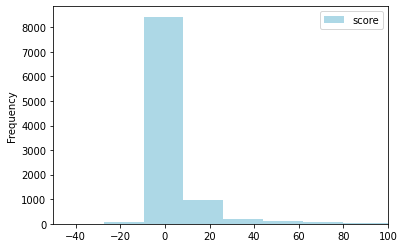

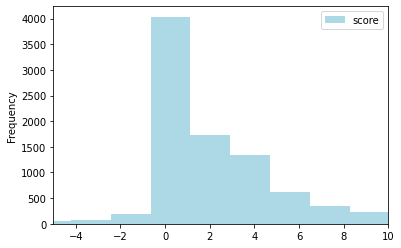

In [15]:
import matplotlib.pyplot as plt
plot_df=reddit_df.limit(10000) # memory are not enough to plot, so just take sample to plot
score_pandas=plot_df.select('score').toPandas()
hist1=score_pandas[['score']].plot(kind='hist', facecolor='lightblue',bins=1000,xlim=(-50,100))
hist2=score_pandas[['score']].plot(kind='hist', facecolor='lightblue',bins=10000,xlim=(-5,10))
plt.show()

In [18]:
# check 50/75 quantile
print(reddit_df.select('score').approxQuantile("score", [0.5], 0))
print(reddit_df.select('score').approxQuantile("score", [0.75], 0))

[2.0]
[4.0]


In [19]:
# divide the score into two classifiers
reddit_df=reddit_df.withColumn('new_score', functions.when(functions.col('score') > 4, 1).otherwise(0))

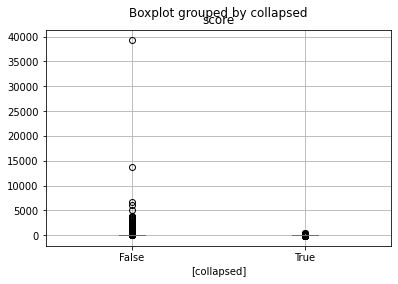

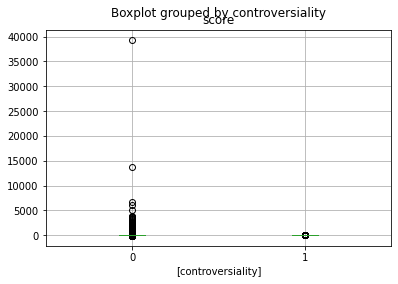

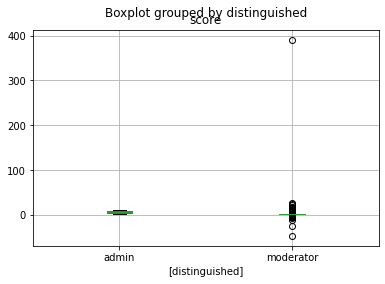

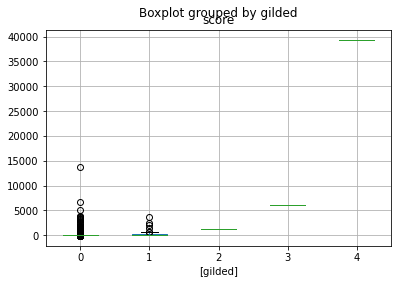

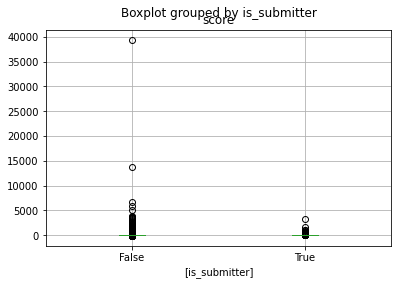

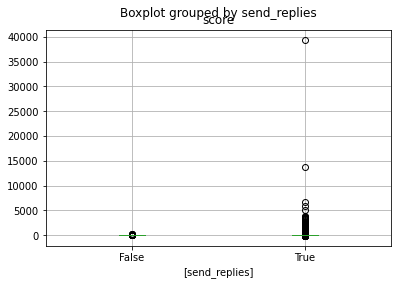

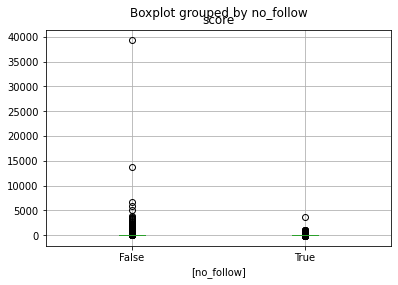

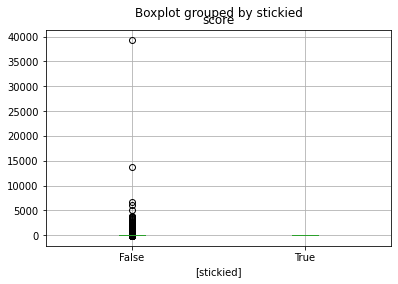

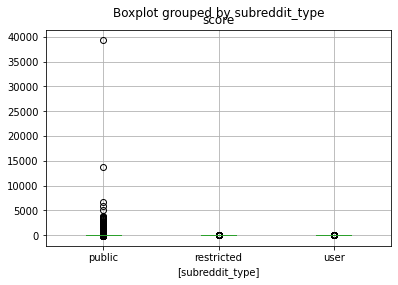

In [26]:
plot_df=reddit_df.limit(1000000)
plot_data=plot_df.toPandas()
# plot box-plot for discrete variables
for i in ["collapsed", "controversiality", "distinguished", "gilded", "is_submitter","send_replies", "no_follow","stickied","subreddit_type"]:
    plot_data.boxplot(column=['score'], by=[i])
# there are very little difference/ imbalance labels for distinguished and subreddit_type, thus those features will not be considered in to modeling. Stickied is also among them, which has very distinct variance by glance, but it could be an important feature influencing the score of the comments, so I decided to join it to the model next step.

In [22]:
# check NA for featrues
for feature in ["collapsed", "controversiality",  "gilded", "is_submitter","send_replies", "no_follow","stickied"]:
    print(feature,reddit_df.where(F.isnull(feature)).count())

collapsed 0
controversiality 0
gilded 0
is_submitter 0
send_replies 0
no_follow 0
stickied 0


In [43]:
# split data into: train, test and predict datasets
splitted_data = reddit_df.randomSplit([0.75, 0.25], 16)
train_data = splitted_data[0]
test_data = splitted_data[1]
print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))

Number of training records: 182788659
Number of testing records : 52017868


In [44]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, IndexToString, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml import Pipeline, Model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [46]:
# transform the colomn
controversiality_OneHotEncoder = OneHotEncoder(inputCol="controversiality", outputCol="controversiality_onehot")
gilded_OneHotEncoder = OneHotEncoder(inputCol="gilded", outputCol="gilded_onehot")

In [45]:
# check schema for features
reddit_df.select("collapsed", "controversiality",  "gilded", "is_submitter","send_replies", "no_follow","stickied").printSchema()

root
 |-- collapsed: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- gilded: long (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- send_replies: boolean (nullable = true)
 |-- no_follow: boolean (nullable = true)
 |-- stickied: boolean (nullable = true)



In [51]:
# create a feature vector by combining all features together using the vectorAssembler method
vectorAssembler_features = VectorAssembler(
    inputCols = ["collapsed",
                 "is_submitter",
                 "send_replies",
                 "gilded_onehot",
                 "controversiality_onehot",
                 "stickied",
                 "no_follow"],
    outputCol = "features")

In [52]:
# define estimators for classification
# build a Logistic regression model using the LogisticRegression estimator
lr = LogisticRegression(labelCol="new_score", featuresCol="features")

In [53]:
# build the pipeline consisting an estimator
pipeline_lr = Pipeline(stages=[controversiality_OneHotEncoder, gilded_OneHotEncoder, vectorAssembler_features,lr])

In [58]:
# fit the logistic regression model
model_lr = pipeline_lr.fit(train_data)

In [78]:
# show the predictions
predictions_lr = model_lr.transform(test_data)

In [79]:
# evaluate the logistic regression model by auroc and auprc
evaluator = BinaryClassificationEvaluator(labelCol='new_score')
auroc = evaluator.evaluate(predictions_lr, {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(predictions_lr, {evaluator.metricName: "areaUnderPR"})
evaluator = MulticlassClassificationEvaluator(labelCol="new_score", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_lr)

In [80]:
# print the Area Under the Curve (AUC) for binary classifier
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))
print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Area under ROC Curve: 0.8709
Area under PR Curve: 0.8196
Accuracy = 0.884236
Test Error = 0.115764


In [81]:
# build a random forest model using the RandomForestClassifier estimator
rf = RandomForestClassifier(labelCol="new_score", featuresCol="features")

In [82]:
# build the pipeline consisting of an estimator
pipeline_rf = Pipeline(stages=[controversiality_OneHotEncoder, gilded_OneHotEncoder, vectorAssembler_features,
                               rf])

In [83]:
# train and fit the random forest model
model_rf = pipeline_rf.fit(train_data)

In [84]:
# show the predictions
predictions_rf = model_rf.transform(test_data)

In [85]:
# check the accuacy of random forest model
evaluator = BinaryClassificationEvaluator(labelCol='new_score')
auroc = evaluator.evaluate(predictions_rf, {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(predictions_rf, {evaluator.metricName: "areaUnderPR"})
evaluatorRF = MulticlassClassificationEvaluator(labelCol="new_score", predictionCol="prediction", metricName="accuracy")
accuracy = evaluatorRF.evaluate(predictions_rf)
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))
print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Area under ROC Curve: 0.8705
Area under PR Curve: 0.8195
Accuracy = 0.884236
Test Error = 0.115764


In [86]:
# build a gbt model using the GBTClassifier estimator
gbt = GBTClassifier(labelCol="new_score", featuresCol="features")

In [87]:
# build the gbt pipeline consisting of an estimator
pipeline_gbt = Pipeline(stages=[controversiality_OneHotEncoder, gilded_OneHotEncoder, vectorAssembler_features,
                               gbt])

In [88]:
# train and fit the gbt model
model_gbt = pipeline_gbt.fit(train_data)

In [89]:
# show the predictions
predictions_gbt = model_gbt.transform(test_data)

In [90]:
# check the accuacy of gbt model
evaluator = BinaryClassificationEvaluator(labelCol='new_score')
auroc = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "areaUnderPR"})
evaluatorgbt = MulticlassClassificationEvaluator(labelCol="new_score", predictionCol="prediction", metricName="accuracy")
accuracy = evaluatorgbt.evaluate(predictions_gbt)
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))
print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Area under ROC Curve: 0.8699
Area under PR Curve: 0.7905
Accuracy = 0.884236
Test Error = 0.115764


In [26]:
sc.stop()
spark.stop()